<a href="https://colab.research.google.com/github/iambrookedrake/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/Brooke_Drake_DSPT6_U1S1M3_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-03-17 20:21:20--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.16.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.16.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  90.6MB/s    in 2.2s    

2020-03-17 20:21:22 (90.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

In [0]:
import pandas as pd
import numpy as np

In [14]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [7]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
opp = pd.read_csv('order_products__prior.csv')
print(opp.shape)
opp.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
opt = pd.read_csv('order_products__train.csv')
print(opt.shape)
opt.tail()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [11]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Need files: order_products__prior, order_products__train, products

To have needed colums: order_id, product_id, product_name

In [21]:
print(opp.shape)
opt.shape

(32434489, 4)


(1384617, 4)

In [22]:
order_products = pd.concat([opp, opt], axis=0)
order_products.shape

(33819106, 4)

In [0]:
columns = ['order_id', 'product_id', 'product_name']

In [25]:
merged = pd.merge(products, order_products, on='product_id', how='inner')
merged

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,7540,4,1
3,1,Chocolate Sandwich Cookies,61,19,9228,2,0
4,1,Chocolate Sandwich Cookies,61,19,9273,30,0
...,...,...,...,...,...,...,...
33819101,49688,Fresh Foaming Cleanser,73,11,3401313,5,0
33819102,49688,Fresh Foaming Cleanser,73,11,655800,10,1
33819103,49688,Fresh Foaming Cleanser,73,11,2198380,10,0
33819104,49688,Fresh Foaming Cleanser,73,11,2508423,3,0


In [29]:
merged['product_name'].value_counts().head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [42]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [43]:
# table2 -> tidy
table_two = table2.reset_index(drop=False)
table_two

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [50]:
tidy2 = table_two.melt(id_vars = 'index',
                       value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson']
                       )
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [51]:
tidy2 = tidy2.rename(columns={
    'index':'trt',
    'variable':'name',
    'value':'result'

})
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# tidy -> table2


In [52]:
# Let's do it all in reverse.
wide2 = tidy2.pivot_table(index = 'trt',
                          columns = 'name',
                          values = 'result')
wide2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [0]:
import seaborn as sns

In [0]:
flights = sns.load_dataset('flights')

In [57]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [59]:
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


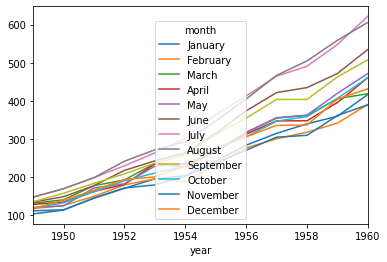

In [60]:
# Flights Pivot Table
flights.pivot_table(index='year', 
                   columns='month', 
                   values='passengers', 
                  ).plot();

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####
# “The Instacart Online Grocery Shopping Dataset 2017”, 
# Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 
# on 2020/03/17

In [70]:
merged['product_name'].value_counts().head(25)

Banana                        491291
Bag of Organic Bananas        394930
Organic Strawberries          275577
Organic Baby Spinach          251705
Organic Hass Avocado          220877
Organic Avocado               184224
Large Lemon                   160792
Strawberries                  149445
Limes                         146660
Organic Whole Milk            142813
Organic Raspberries           142603
Organic Yellow Onion          117716
Organic Garlic                113936
Organic Zucchini              109412
Organic Blueberries           105026
Cucumber Kirby                 99728
Organic Fuji Apple             92889
Organic Lemon                  91251
Organic Grape Tomatoes         88078
Apple Honeycrisp Organic       87272
Seedless Red Grapes            86748
Organic Cucumber               85005
Honeycrisp Apple               83320
Organic Baby Carrots           80493
Sparkling Water Grapefruit     79245
Name: product_name, dtype: int64

In [71]:
condition = (orders['order_hour_of_day']>=12)
condition

0          False
1          False
2           True
3          False
4           True
           ...  
3421078     True
3421079    False
3421080     True
3421081     True
3421082     True
Name: order_hour_of_day, Length: 3421083, dtype: bool

In [73]:
late = orders[condition]
late

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2,473747,1,prior,3,3,12,21.0
4,431534,1,prior,5,4,15,28.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
17,3194192,2,prior,7,2,12,14.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [0]:
columns = ['order_id', 'product_id', 'product_name', 'order_hour_of_day']

In [75]:
latemerged = pd.merge(merged, late, on='order_id', how='inner')
latemerged

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,5319,3,1,196224,prior,65,1,14,1.0
1,9076,Blueberries,116,1,5319,4,1,196224,prior,65,1,14,1.0
2,14161,Kiwi,24,4,5319,5,1,196224,prior,65,1,14,1.0
3,16797,Strawberries,24,4,5319,7,1,196224,prior,65,1,14,1.0
4,19972,Semi-Sweet Chocolate Morsels,17,13,5319,1,1,196224,prior,65,1,14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21899201,49683,Cucumber Kirby,83,4,3412539,1,0,9900,prior,1,4,18,NaN
21899202,49683,Cucumber Kirby,83,4,1132592,1,1,132799,train,4,3,12,30.0
21899203,49683,Cucumber Kirby,83,4,2873216,1,1,78466,train,14,0,15,14.0
21899204,49683,Cucumber Kirby,83,4,3032765,1,1,205875,train,5,1,19,8.0


In [78]:
latemerged['product_name'].value_counts()

Banana                               313384
Bag of Organic Bananas               252095
Organic Strawberries                 178282
Organic Baby Spinach                 164262
Organic Hass Avocado                 144474
                                      ...  
Classic Frankfurters                      1
Unsalted Mushroom Barley Soup             1
Titanium Coated Blades Cartridges         1
Sweet 'N Heat Coconut Chips               1
Lemon Dishwashing Liquid                  1
Name: product_name, Length: 49585, dtype: int64

In [80]:
latemerged['order_number'].value_counts()

1      1396307
3      1379205
2      1376532
4      1319111
5      1168827
        ...   
96        8123
97        8017
98        7820
99        7511
100       4441
Name: order_number, Length: 100, dtype: int64

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####